# Bonus Assignment: Advanced Model Enhancement and Evaluation
#### Fraud Detection using Random Forest

### 1. Introduction
In this assignment, we will:
- Balance the dataset using SMOTE.
- Perform 5-fold cross-validation for a Random Forest model.
- Analyze feature importance to understand which features contribute most to predictions.

### 2. Import Libraries

In [10]:
# Core Libraries
import pandas as pd
import numpy as np

In [12]:
# For Data Balancing
from imblearn.over_sampling import SMOTE

In [57]:
# For Modeling and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [16]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

### 3. Load and Prepare Data

In [23]:
# Load pre-processed data (use your main dataset or previously saved cleaned data)
data = pd.read_csv('loan.csv')

In [29]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [27]:
# Display basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 2.3+ MB


In [31]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.740000e+03,2.740000e+03,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,...,0.0,0.0,0.0,0.0,2739.000000,2739.0,0.0,0.0,0.0,0.0
mean,1.048000e+06,1.278469e+06,13050.355839,12823.421533,12785.726746,377.685591,64292.728810,14.560536,0.101825,0.863504,...,NaN,NaN,NaN,NaN,0.017525,0.0,NaN,NaN,NaN,NaN
std,2.050759e+04,2.399039e+04,7854.858563,7591.635072,7564.534385,211.734021,37715.827101,6.307897,0.394648,0.981938,...,NaN,NaN,NaN,NaN,0.131240,0.0,NaN,NaN,NaN,NaN
min,6.232310e+05,7.987330e+05,1000.000000,1000.000000,1000.000000,32.230000,9960.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,1.038873e+06,1.268452e+06,7000.000000,7000.000000,7000.000000,217.855000,40000.000000,9.817500,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,1.050026e+06,1.280830e+06,12000.000000,12000.000000,11950.000000,341.245000,55850.000000,14.650000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,1.059523e+06,1.290949e+06,18000.000000,17200.000000,17200.000000,494.590000,78237.250000,19.552500,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1283.500000,550000.000000,29.850000,4.000000,8.000000,...,NaN,NaN,NaN,NaN,1.000000,0.0,NaN,NaN,NaN,NaN


In [37]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [39]:
# Select required columns
data = data[['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'term', 'grade', 'home_ownership']]

In [51]:
# Check the data type of 'int_rate' and convert it to string if necessary
if data['int_rate'].dtype != 'object':
    data['int_rate'] = data['int_rate'].astype(str)

# Remove '%' sign and convert to float
data['int_rate'] = data['int_rate'].str.replace('%', '').astype(float)

# Display the first few rows of the cleaned 'int_rate' column
print(data['int_rate'].head())

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64


In [59]:
# Encode categorical variables using LabelEncoder
categorical_columns = ['term', 'grade', 'home_ownership']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Display the first few rows of the preprocessed dataset
print(data.head())

   loan_amnt  funded_amnt  int_rate  installment  term  grade  home_ownership
0       5000         5000     10.65       162.87     0      1               2
1       2500         2500     15.27        59.83     1      2               2
2       2400         2400     15.96        84.33     0      2               2
3      10000        10000     13.49       339.31     0      2               2
4       3000         3000     12.69        67.79     1      1               2


### 4. Define Target and Features1

In [62]:
# Define a dummy target column for fraud detection
np.random.seed(42)
data['fraud_flag'] = np.random.choice([0, 1], size=len(data), p=[0.95, 0.05])  # Imbalanced target

In [64]:
# Define features and target
X = data.drop('fraud_flag', axis=1)
y = data['fraud_flag']

### 5. Data Balancing
#### Using SMOTE for Oversampling

In [67]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Display the balanced class distribution
print("Class distribution after SMOTE:")
print(y_balanced.value_counts())

Class distribution after SMOTE:
fraud_flag
0    2594
1    2594
Name: count, dtype: int64


### 6. Train-Test Split

In [70]:
# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 3631
Testing set size: 1557


### 7. Build Random Forest Model

In [73]:
# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

In [75]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
# Evaluate on the test set
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       788
           1       0.91      0.90      0.90       769

    accuracy                           0.91      1557
   macro avg       0.91      0.91      0.91      1557
weighted avg       0.91      0.91      0.91      1557



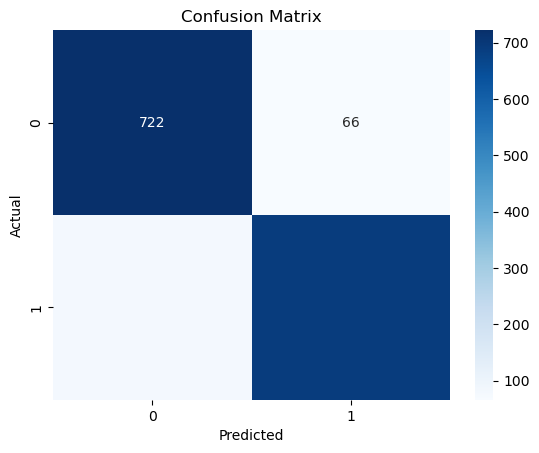

In [79]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 8. Cross-Validation

In [82]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_balanced, y_balanced, cv=5, scoring='accuracy')

# Display results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.85260116 0.91618497 0.92485549 0.92381871 0.92574735]
Mean Accuracy: 0.9086415348855358


### 9. Feature Importance Analysis